**Anomalies in Stock Market: Case Study**



In [21]:
import pandas as pd 
import datetime
import matplotlib.pyplot as plt

data=pd.read_csv(r"C:\Users\daalo\Downloads\stock_market.csv")
stock=pd.DataFrame(data)
print(stock.head())




   Unnamed: 0        Date Ticker   Adj Close       Close        High  \
0           0  2023-04-06   AAPL  163.785767  164.660004  164.960007   
1           1  2023-04-06   GOOG  108.900002  108.900002  109.629997   
2           2  2023-04-06   MSFT  289.226227  291.600006  292.079987   
3           3  2023-04-06   NFLX  339.329987  339.329987  340.480011   
4           4  2023-04-06   TSLA  185.059998  185.059998  186.389999   

          Low        Open       Volume  
0  162.000000  162.429993   45390100.0  
1  104.815002  105.769997   34684200.0  
2  282.029999  283.209991   29770300.0  
3  332.630005  339.339996    4660500.0  
4  179.740005  183.080002  123857900.0  


DATA TRANSFORMATIONS & AJOUT COLONNE RENDEMENT

In [22]:
stock['Date']=stock['Date'].apply(pd.to_datetime, format='ISO8601')


stock= stock.reset_index(drop=True)
stock['return'] = stock.groupby('Ticker',group_keys=False)['Adj Close'].apply(lambda x: x.pct_change())

print(stock)

      Unnamed: 0       Date Ticker   Adj Close       Close        High  \
0              0 2023-04-06   AAPL  163.785767  164.660004  164.960007   
1              1 2023-04-06   GOOG  108.900002  108.900002  109.629997   
2              2 2023-04-06   MSFT  289.226227  291.600006  292.079987   
3              3 2023-04-06   NFLX  339.329987  339.329987  340.480011   
4              4 2023-04-06   TSLA  185.059998  185.059998  186.389999   
...          ...        ...    ...         ...         ...         ...   
1245        1245 2024-04-04   AAPL  168.820007  168.820007  171.919998   
1246        1246 2024-04-04   GOOG  151.940002  151.940002  156.179993   
1247        1247 2024-04-04   MSFT  417.880005  417.880005  428.670013   
1248        1248 2024-04-04   NFLX  617.140015  617.140015  638.000000   
1249        1249 2024-04-04   TSLA  171.110001  171.110001  177.190002   

             Low        Open       Volume    return  
0     162.000000  162.429993   45390100.0       NaN  
1  

DISTRIBUTION DU RENDEMENT

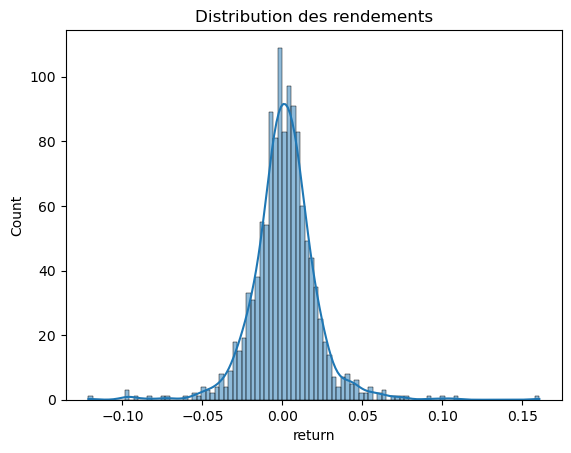

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(stock['return'], bins=100, kde=True)
plt.title("Distribution des rendements")
plt.show()

EDA

In [39]:
print(stock[['Ticker', 'Date', 'Adj Close', 'return']].head(10))


  Ticker       Date   Adj Close    return
0   AAPL 2023-04-06  163.785767       NaN
1   GOOG 2023-04-06  108.900002       NaN
2   MSFT 2023-04-06  289.226227       NaN
3   NFLX 2023-04-06  339.329987       NaN
4   TSLA 2023-04-06  185.059998       NaN
5   AAPL 2023-04-10  161.169724 -0.015972
6   GOOG 2023-04-10  106.949997 -0.017906
7   MSFT 2023-04-10  287.034241 -0.007579
8   NFLX 2023-04-10  338.989990 -0.001002
9   TSLA 2023-04-10  184.509995 -0.002972


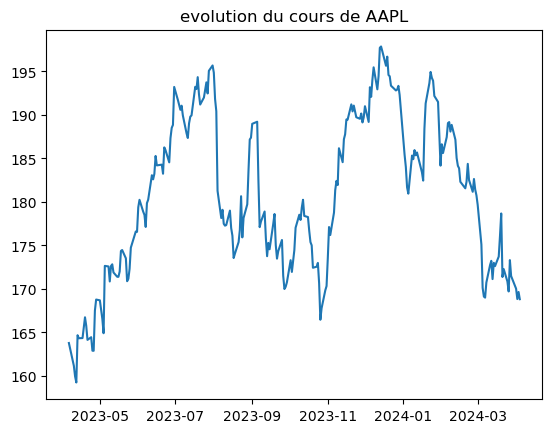

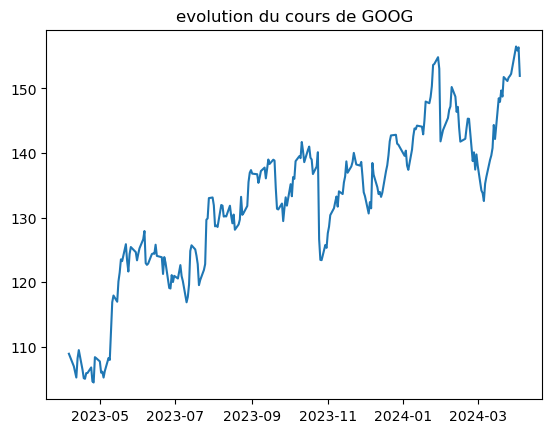

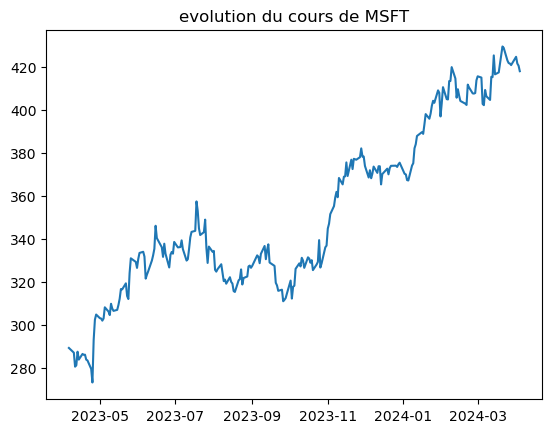

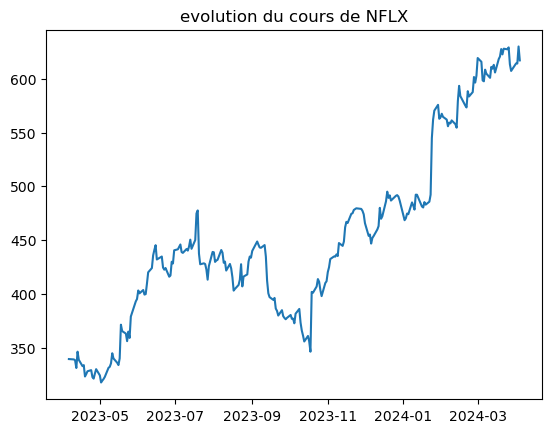

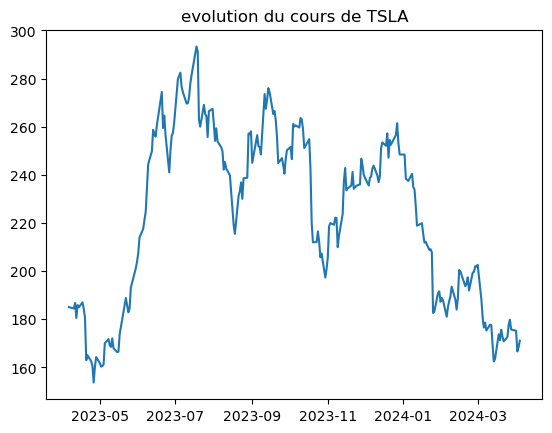

In [45]:
for i in stock['Ticker'].unique():
    df_i=stock[stock['Ticker']==i]
    plt.figure()
    plt.plot(df_i['Date'], df_i['Adj Close'])
    plt.title(f"evolution du cours de {i}")

In [40]:
stock.groupby('Ticker')['return'].agg(['mean', 'std', 'min', 'max']).sort_values('std', ascending=False)


,mean,std,min,max
Ticker,,,,
TSLA,0.000135,0.029929,-0.121253,0.100925
NFLX,0.002648,0.022400,-0.084110,0.160548
GOOG,0.001487,0.017203,-0.095989,0.055949
MSFT,0.001575,0.013900,-0.037637,0.072435
AAPL,0.000196,0.012178,-0.048020,0.046927


AJOUT COLONNE RENDEMENT STANDARDISE & ANOMALIE

In [11]:
import numpy as np

stock['z_score_return'] = stock.groupby('Ticker')['return'].transform(
    lambda x: (x - x.mean()) / x.std()
)
stock['anomaly'] = np.where(abs(stock['z_score_return']) > 3, 1, 0)


ANALYSE DES TAUX D'ANOMALIES PAR TICKER

In [9]:
tickers = stock['Ticker'].unique()

for h in tickers:
    df_h=stock[stock['Ticker']==h]
    anomaly_rate = df_h['anomaly'].mean() * 100
    print(f"📊 {h} : {anomaly_rate:.2f}% de jours anormaux détectés")


📊 AAPL : 1.20% de jours anormaux détectés
📊 GOOG : 1.60% de jours anormaux détectés
📊 MSFT : 0.40% de jours anormaux détectés
📊 NFLX : 1.60% de jours anormaux détectés
📊 TSLA : 2.00% de jours anormaux détectés


Les résultats confirment la différence de volatilité entre les entreprises technologiques.
Tesla et Netflix présentent les plus fortes fluctuations, tandis que Microsoft reste le plus stable.
Ces indicateurs simples permettent de quantifier objectivement la sensibilité d’un titre aux variations de marché.

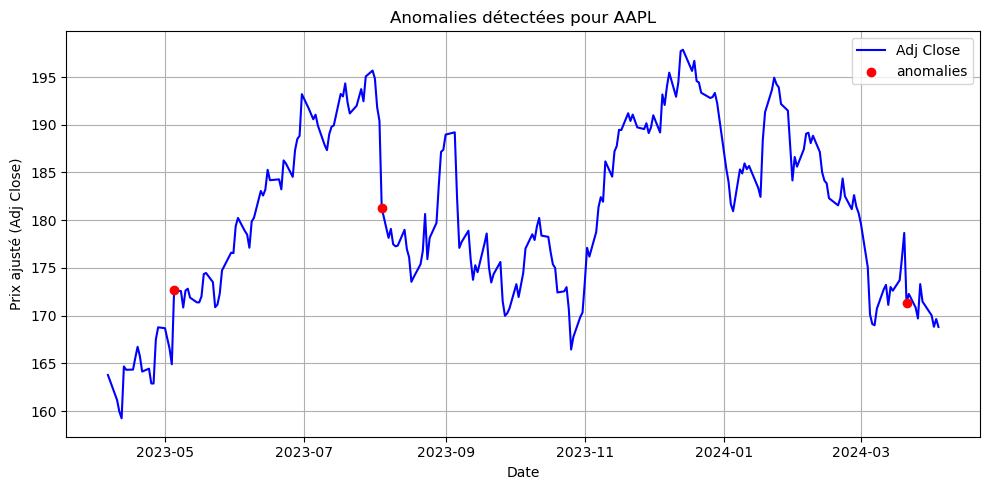

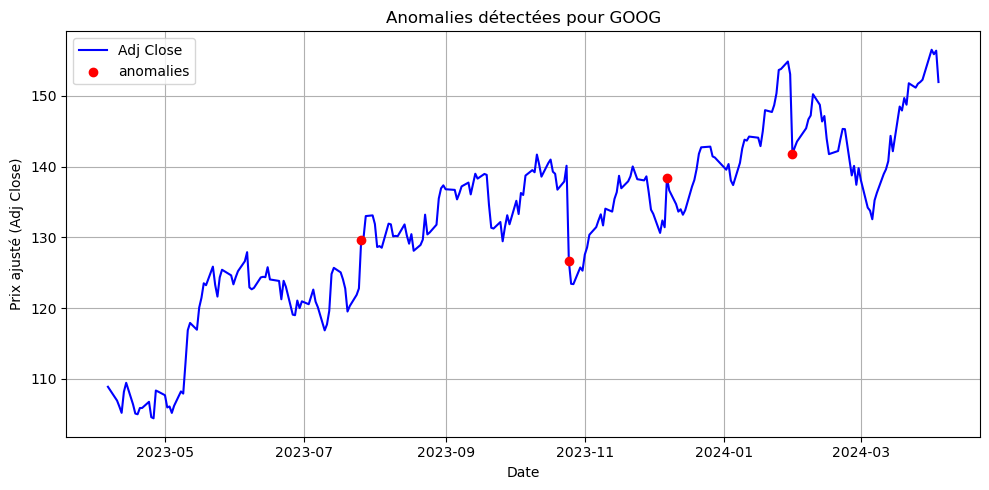

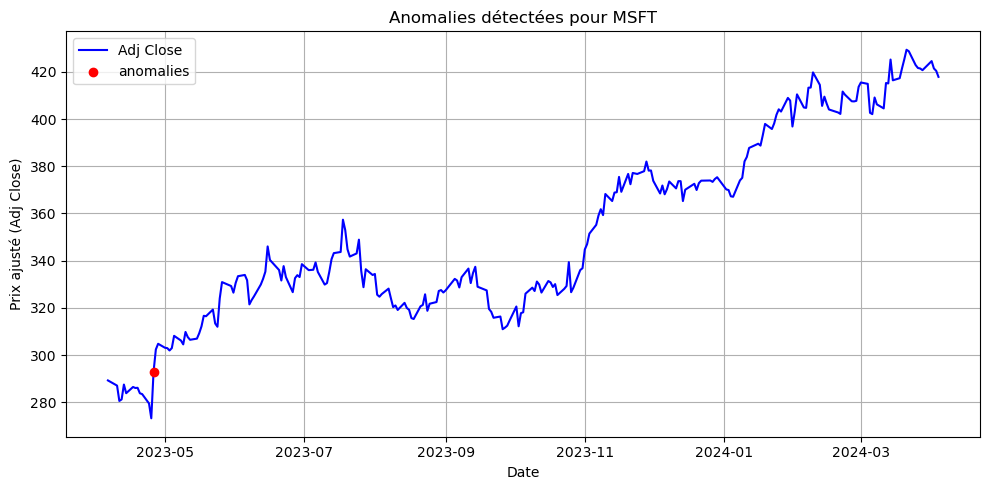

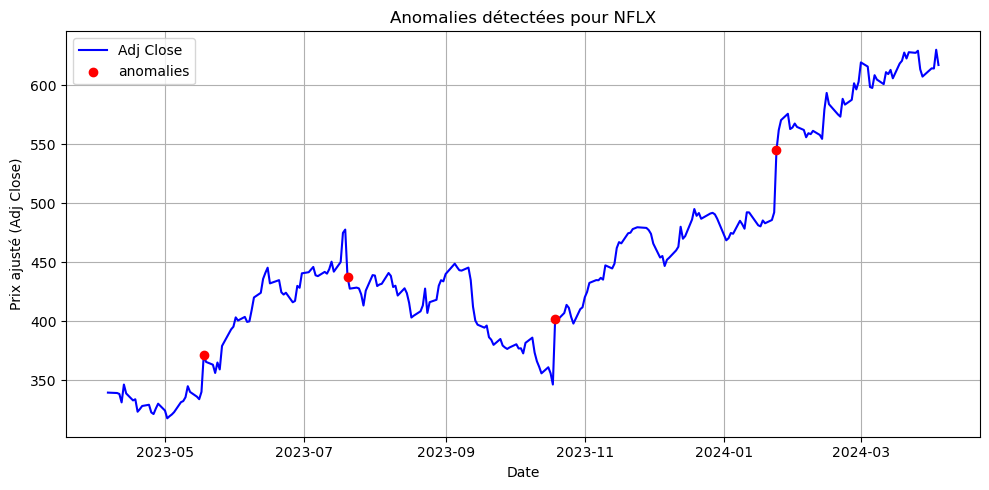

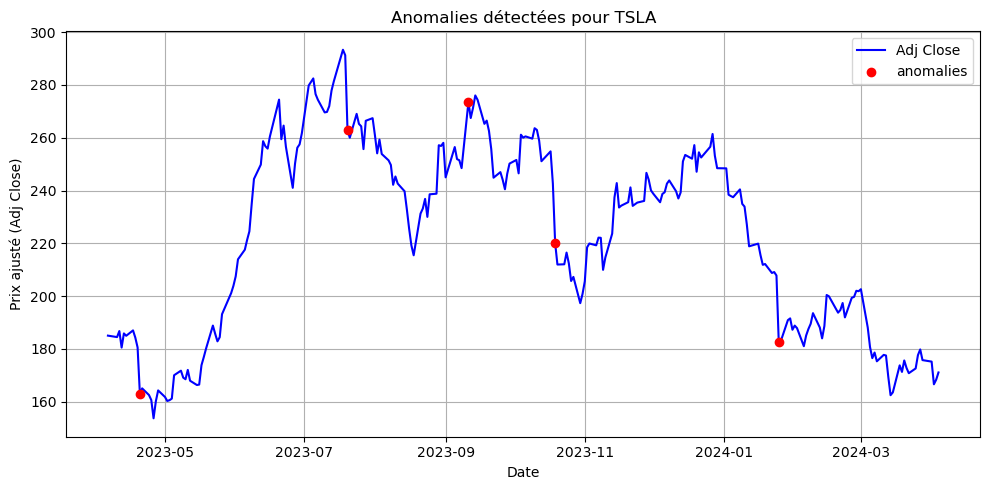

In [ ]:
import matplotlib.pyplot as plt

# Liste de tous les tickers
tickers = stock['Ticker'].unique()

# Boucle sur chaque ticker
for t in tickers:
    df_t = stock[stock['Ticker'] == t]

    plt.figure(figsize=(10, 5))
    plt.plot(df_t['Date'], df_t['Adj Close'], label='Adj Close', color='blue')
    plt.scatter(df_t.loc[df_t['anomaly'] == 1, 'Date'],
                df_t.loc[df_t['anomaly'] == 1, 'Adj Close'],
                color='red', label='anomalies', zorder=5)
    plt.title(f"Anomalies détectées pour {t}")
    plt.xlabel("Date")
    plt.ylabel("Prix ajusté (Adj Close)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [12]:
stock['z_score_volume'] = stock.groupby('Ticker')['Volume'].transform(
    lambda x: (x - x.mean()) / x.std()
)

stock[stock['anomaly'] == 1][['Ticker', 'Date', 'return', 'z_score_volume']].head(10)


,Ticker,Date,return,z_score_volume
49,TSLA,2023-04-20,-0.097458,3.587510
67,MSFT,2023-04-26,0.072435,4.174740
100,AAPL,2023-05-05,0.046927,3.238052
148,NFLX,2023-05-18,0.092158,3.992436
358,NFLX,2023-07-20,-0.084110,4.788509
359,TSLA,2023-07-20,-0.097370,2.191607
376,GOOG,2023-07-26,0.055949,2.730355
410,AAPL,2023-08-04,-0.048020,3.381926
539,TSLA,2023-09-11,0.100925,2.172492
678,NFLX,2023-10-19,0.160548,5.849601


FLAG ANOMALIE VOLUME 

In [ ]:
stock['anomaly_vol'] = (stock['z_score_volume'].abs() > 2.5).astype(int)


VOLUME PAR TICKER

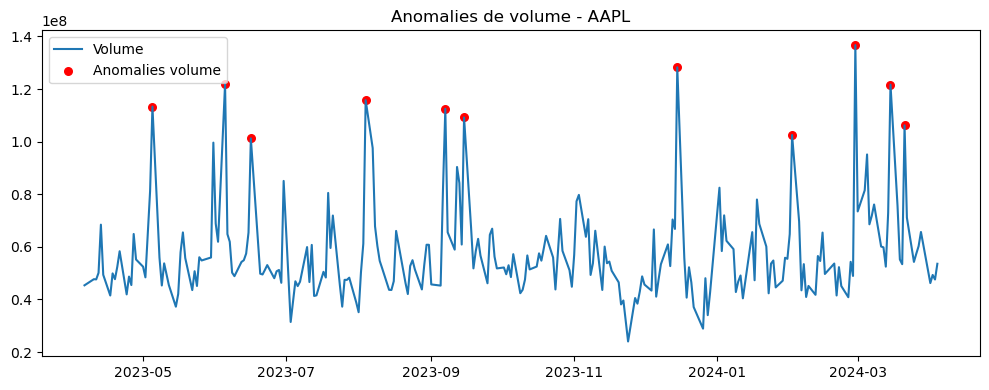

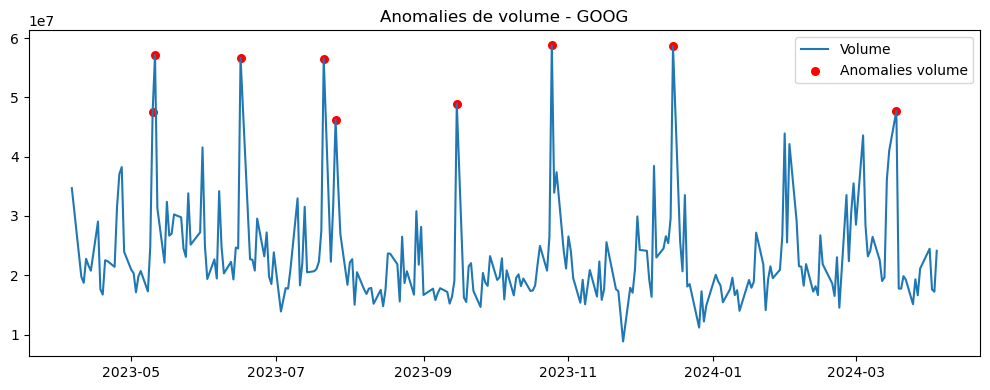

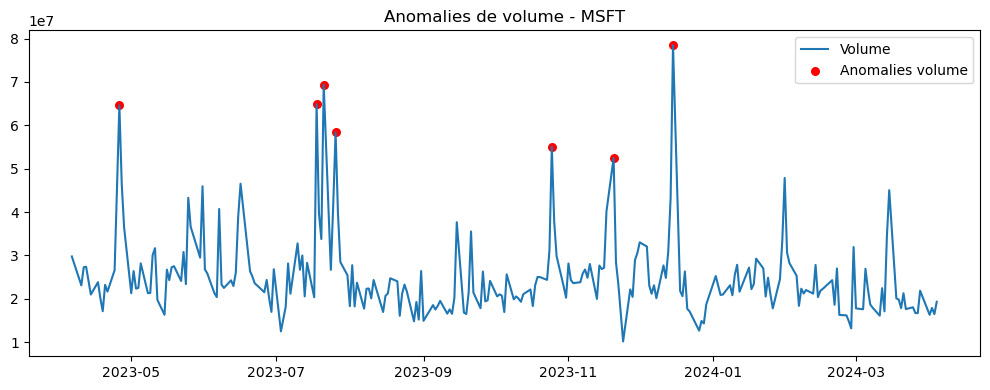

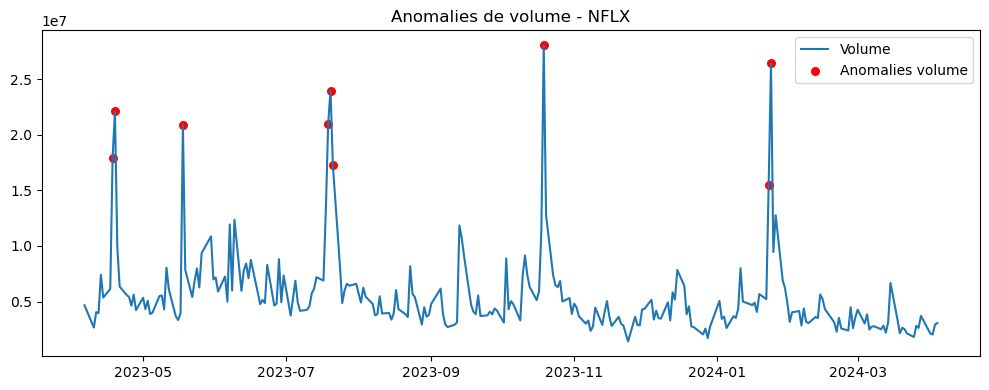

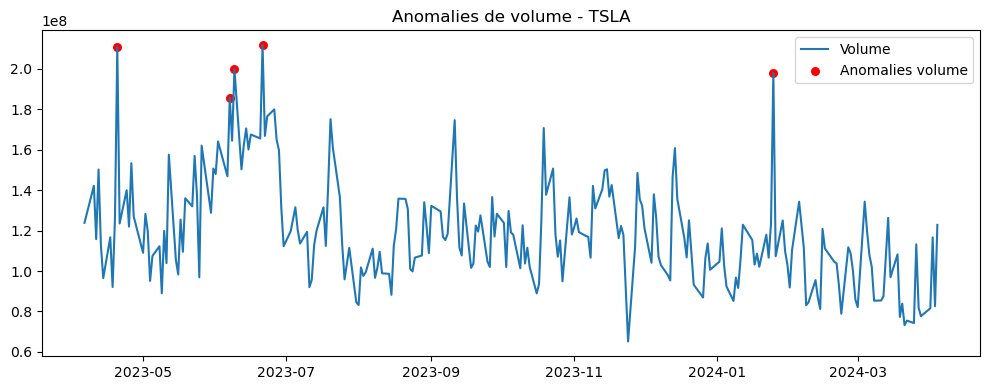

In [17]:
import matplotlib.pyplot as plt

for y in stock['Ticker'].unique():
    df_y = stock[stock['Ticker']==y].sort_values('Date')
    plt.figure(figsize=(10,4))
    plt.plot(df_y['Date'], df_y['Volume'], label='Volume')
    plt.scatter(df_y.loc[df_y['anomaly_vol']==1, 'Date'],
                df_y.loc[df_y['anomaly_vol']==1, 'Volume'],
                marker='o', s=30, label='Anomalies volume', color='red')
    plt.title(f'Anomalies de volume - {y}')
    plt.legend(); plt.tight_layout(); plt.show()


In [18]:


rate = stock.groupby('Ticker').agg(
    rate_price = ('anomaly', 'mean'),
    rate_vol   = ('anomaly_vol', 'mean')
).mul(100).round(2)

rate.sort_values('rate_vol', ascending=False)


,rate_price,rate_vol
Ticker,,
AAPL,1.2,4.4
GOOG,1.6,3.6
NFLX,1.6,3.6
MSFT,0.4,2.8
TSLA,2.0,2.0


L’analyse croisée des anomalies de prix et de volume montre que les jours de forte activité ne se traduisent pas toujours par des mouvements de prix extrêmes.

Des titres comme AAPL ou MSFT présentent de nombreuses anomalies de volume sans forte variation de prix, indiquant une activité de marché élevée mais maîtrisée.

À l’inverse, TSLA montre une corrélation directe entre volume et volatilité, signe d’un titre très sensible aux flux de transactions.

Globalement, la majorité des anomalies de prix sont accompagnées de volumes anormaux, ce qui renforce leur crédibilité en tant que “vraies” anomalies de marché.

In [19]:
# Anomalie conjointe le même jour
stock['anomaly_both'] = ((stock['anomaly']==1) & (stock['anomaly_vol']==1)).astype(int)

confirm = stock.groupby('Ticker').apply(
    lambda g: 100 * g['anomaly_both'].sum() / max(g['anomaly'].sum(), 1)
).reset_index(name='%_prix_confirmé_par_volume')

confirm.sort_values('%_prix_confirmé_par_volume', ascending=False)


,Ticker,%_prix_confirmé_par_volume
0,AAPL,100.0
2,MSFT,100.0
3,NFLX,100.0
1,GOOG,50.0
4,TSLA,40.0


L’analyse du rapprochement entre anomalies de prix et de volume montre que la majorité des variations extrêmes observées sont soutenues par des volumes anormaux, confirmant leur nature réelle.

Les titres comme Apple, Microsoft et Netflix présentent des anomalies cohérentes et “validées” par le marché, tandis que Tesla et Google affichent des anomalies de prix plus souvent indépendantes du volume, révélant une volatilité propre ou des mouvements spéculatifs.

Ce croisement entre prix et volume renforce la robustesse du modèle de détection et permet de différencier les anomalies réelles des signaux bruités.